# Packages

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.datasets import mnist, imdb, boston_housing

## Standardizing Data

In [55]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

We have $404\times13$ 2-dimensional matrix for train data

$$\mathbf{X} _{train}=\left(\begin{matrix}x_{11}^{(train)}&x_{12}^{(train)}&\cdots&x_{1,13}^{(train)}\\x_{21}^{(train)}&x_{22}^{(train)}&\cdots&x_{2,13}^{(train)}\\\vdots&\ddots&\ddots&\vdots\\x_{404,1}^{(train)}&x_{404,2}^{(train)}&\cdots&x_{404,13}^{(train)}\end{matrix}\right)\tag{1}$$

In [56]:
train_data.shape

(404, 13)

We have $102\times13$ 2-dimensional matrix for test data

$$\mathbf{X} _{test}=\left(\begin{matrix}x_{11}^{(test)}&x_{12}^{(test)}&\cdots&x_{1,13}^{(test)}\\x_{21}^{(test)}&x_{22}^{(test)}&\cdots&x_{2,13}^{(test)}\\\vdots&\vdots&\ddots&\vdots\\x_{102,1}^{(test)}&x_{102,2}^{(test)}&\cdots&x_{102,13}^{(test)}\end{matrix}\right)\tag{2}$$

In [57]:
test_data.shape

(102, 13)

Using (1), we can get mean of training data like

$$\bar{x}_{.1}^{(train)}=\frac{1}{404}(x_{11}^{(train)}+x_{21}^{(train)}+\cdots+x_{404}^{(train)})\tag{3}$$

$$\bar{\mathbf{x}}=\left(\begin{matrix}\bar{x}_{.1}&\bar{x}_{.2}&\cdots&\bar{x}_{.13}\end{matrix}\right)\tag{4}$$

In [58]:
mean = train_data.mean(axis=0)

We can standardize data by

$$x_{ij}^{(std)}=\frac{x_{ij}-\bar{x} _{.j}}{s_{j}}\ \forall i=1, 2, \cdots, n, j=1, 2, \cdots, d \tag{5}$$


With (1), (4), we can get

$$\mathbf{X} _{train}-\bar{\mathbf{x}} _{train}=\left(\begin{matrix}x_{11}^{(train)}&x_{12}^{(train)}&\cdots&x_{1,13}^{(train)}\\x_{21}^{(train)}&x_{22}^{(train)}&\cdots&x_{2,13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{404,1}^{(train)}&x_{404,2}^{(train)}&\cdots&x_{404,13}^{(train)}\end{matrix}\right)-\left(\begin{matrix}\bar{x}_{.1}^{(train)}&\bar{x}_{.2}^{(train)}&\cdots&\bar{x}_{.13}^{(train)}\end{matrix}\right)\tag{6}$$

$$=\left(\begin{matrix}x_{11}^{(train)}-\bar{x}_{.1}^{(train)}&x_{12}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{1,13}^{(train)}-\bar{x}_{.13}^{(train)}\\x_{21}^{(train)}-\bar{x}_{.1}^{(train)}&x_{22}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{2,13}^{(train)}-\bar{x}_{.13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{404,1}^{(train)}-\bar{x}_{.1}^{(train)}&x_{404,2}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{404,13}^{(train)}-\bar{x}_{.13}^{(train)}\end{matrix}\right)\tag{7}$$

In [59]:
train_data -= mean

Standard deviation of training data can be calculated by

$$s_j^{(train)}=\sqrt{\frac{1}{n_{train}-1}\sum^{n_{train}}_{i=1}(x_{ij}^{(train)}-\bar{x} _{.j}^{(train)})^2}\tag{8}$$

$$\mathbf{s}_{train}=\sqrt{\frac{1}{n_{train}-1}diag((\mathbf{X}^{(train)}-\bar{\mathbf{x}}^{(train)})^T(\mathbf{X}^{(train)}-\bar{\mathbf{x}}^{(train)}))}\tag{9}$$

$$\mathbf{s}_{train}=\left(\begin{matrix}s_1^{(train)}&s_2^{(train)}&\cdots&s_{13}^{(train)}\end{matrix}\right)\tag{10}$$

In [60]:
std = train_data.std(axis=0)

By (6), (10) we can calculate standardized train data as

$$\mathbf{X} _{train}^{(std)}=(\mathbf{X} _{train}-\bar{\mathbf{x}}_{train})⊘\mathbf{s}=\left(\begin{matrix}x_{11}^{(train)}-\bar{x}_{.1}^{(train)}&x_{12}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{113}^{(train)}-\bar{x}_{.13}^{(train)}\\x_{21}^{(train)}-\bar{x}_{.1}^{(train)}&x_{22}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{213}^{(train)}-\bar{x}_{.13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{4041}^{(train)}-\bar{x}_{.1}^{(train)}&x_{4042}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{40413}^{(train)}-\bar{x}_{.13}^{(train)}\end{matrix}\right)⊘\left(\begin{matrix}s_1^{(train)}&s_2^{(train)}&\cdots&s_{13}^{(train)}\end{matrix}\right)\tag{11}$$

$$=\left(\begin{matrix}\frac{x_{11}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{12}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{113}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\\\frac{x_{21}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{22}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{213}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\\\vdots&\vdots&\ddots&\vdots\\\frac{x_{4041}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{4042}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{40413}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\end{matrix}\right)\tag{12}$$

In [61]:
train_data /= std

Like (3)-(12), we can get standardized test data as

$$\mathbf{X} _{test}^{(std)}=\left(\begin{matrix}\frac{x_{11}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{12}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{113}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\\\frac{x_{21}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{22}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{213}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\\\vdots&\vdots&\ddots&\vdots\\\frac{x_{102,1}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{102,2}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{102,13}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\end{matrix}\right)\tag{13}$$

In [62]:
test_data -= mean
test_data /= std

## Model Building

On basic model, have input layer like

$$\mathbf{x} _{1\times 13}\tag{14}$$

Among total 2 hidden layer, first layer is

$$\mathbf{h}^{(1)}_{1\times64}=ReLU(\mathbf{W}^{(1)}_{13\times64}\mathbf{x}_{1\times 13}+\mathbf{b}^{(1)}_{1\times64})\tag{15}$$

Second layer is

$$\mathbf{h}^{(2)}_{1\times64}=ReLU(\mathbf{h}^{(1)}_{1\times 64}\mathbf{W}^{(2)}_{64\times64}+\mathbf{b}^{(2)}_{1\times64})\tag{16}$$

ReLU function can be defined by

$$ReLU(x)=max(0, x) \tag{17}$$

Lastly, we can denote output layer as

$$\hat{y}=\mathbf{h}^{(2)}_{1\times64}\mathbf{W}^{(3)}_{64\times1}+b^{3}\tag{18}$$

In [63]:
model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
])

Using root mean square propagation(RMSprop) as the optimizer with mean squared error (MSE) as the loss function. During training, use mean absolute error (MAE) as the evaluation metric.

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y} _i)^2\tag{19}$$

$$MAE=\frac{1}{n}\sum^n_{i=1}|y_i-\hat{y} _i|\tag{20}$$

In [64]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

We can make this model building sequence as a function like

In [65]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

## $k$-fold Cross Validation

We can make algorithm for $k$-fold cross valiation and recording scores like

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> k-fold
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> $404\times 13$ 2-dimensional matrix $\mathbf{X}_{train}$, $404\times1$ vector $\mathbf{y}_{train}$, Number of folds $k=4$, number of epochs $E=300$<br>
&emsp; <strong>Let</strong> all_score ← empty list<br>
&emsp; <strong>Let</strong> $n_{fold}$ ← $404/4=101$
&emsp; <strong>for</strong> $i=0$ <strong>to</strong> $3$ <strong>do</strong><br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{101\times13}^{(val)}$ ← rows [$in_{fold}:(i+1)n_{fold}$ of $\mathbf{X}^{(train)}_{404\times13}$]<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{101\times1}^{(val)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{303\times13}^{(partial)}$ ← rows of $\mathbf{X}_{404\times13}^{(train)}$ excluding fold $i$<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{303\times1}^{(partial)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> model ← build(model)<br>
&emsp;&emsp; <strong>Train</strong>  model on $(\mathbf{X}_{303\times13}^{(partial)}$, $\mathbf{y}_{303\times1}^{(partial)})$ for $E=300$ epochs using RMSprop + MSE<br>

&emsp;&emsp; <strong>Let</strong> $MAE_i$ ← evaluate model on $(\mathbf{X}_{101\times13}^{(partial)}$, $\mathbf{y}_{101\times1}^{(partial)})$<br>
&emsp;&emsp; <strong>Append</strong> $MAE_i$ <strong>to</strong> all_scores<br>

<strong>Output</strong> all_scores$\in \mathbb{R}_{1\times4}$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

With algorithm, we can apply $k$-fold cross validation on python as

In [66]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can see the validation mean absolute error for all 4 folds by

$$\rm{all\_scores}=\left(\begin{matrix}MAE_1^{(val)}&MAE_2^{(val)}&MAE_3^{(val)}&MAE_4^{(val)}\end{matrix}\right)\tag{21}$$

In [67]:
all_scores

[2.290428876876831, 2.440171003341675, 2.3517141342163086, 2.2934329509735107]

Last, we can get final mean of validation mean absolute error for all 4 folds. However, this value is only final output of our model, we can't check whether it is overfitted or underfitted

In [68]:
np.mean(all_scores)

2.3439367413520813

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> k-fold with history
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> $404\times 13$ 2-dimensional matrix $\mathbf{X}_{train}$, $404\times1$ vector $\mathbf{y}_{train}$, Number of folds $k=4$, number of epochs $E=300$<br>
&emsp; <strong>Let</strong> all_mae_histories ← empty list<br>
&emsp; <strong>Let</strong> $n_{fold}$ ← $404/4=101$
&emsp; <strong>for</strong> $i=0$ <strong>to</strong> $3$ <strong>do</strong><br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{101\times13}^{(val)}$ ← rows [$in_{fold}:(i+1)n_{fold}$ of $\mathbf{X}^{(train)}_{404\times13}$]<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{101\times1}^{(val)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{303\times13}^{(partial)}$ ← rows of $\mathbf{X}_{404\times13}^{(train)}$ excluding fold $i$<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{303\times1}^{(partial)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> model ← build(model)<br>
&emsp;&emsp; <strong>Train</strong>  model on $(\mathbf{X}_{303\times13}^{(partial)}$, $\mathbf{y}_{303\times1}^{(partial)})$ for $E=300$ epochs using RMSprop + MSE<br>

&emsp;&emsp; <strong>Let</strong> mae_history ← validation MAE for each epoch<br>
&emsp;&emsp; <strong>Append</strong> mae_history <strong>to</strong> all_mae_histories<br>

<strong>Output</strong> all_mae_histories$\in \mathbb{R}_{4\times300}$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

With algorithm, we can apply $k$-fold cross validation with history on python as

In [69]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=100, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


As shown in the pseudocode, all_mae_histories have validation $MAE$ over 300 epochs for each of 4 folds. We can denote all_mae_histories as

$$\rm{all\_mae\_histories}=\left(\begin{matrix}\rm{mae\_history}^{(1)}\\\rm{mae\_history}^{(2)}\\\rm{mae\_history}^{(3)}\\\rm{mae\_history}^{(4)}\\\end{matrix}\right)\tag{22}$$

On (22), each mae_history can be denoted by

$$\rm{mae\_history}^{(1)}=\left(\begin{matrix}MAE_{1}^{(1)}&MAE_{2}^{(1)}&\cdots&MAE_{300}^{(1)}\end{matrix}\right)\tag{23}$$

With (22), (23), all_mae_histories can be denoted by

$$\rm{all\_mae\_histories}=\left(\begin{matrix}MAE_{1}^{(1)}&MAE_{2}^{(1)}&\cdots&MAE_{300}^{(1)}\\MAE_{1}^{(2)}&MAE_{2}^{(2)}&\cdots&MAE_{300}^{(2)}\\MAE_{1}^{(3)}&MAE_{2}^{(3)}&\cdots&MAE_{300}^{(3)}\\MAE_{1}^{(4)}&MAE_{2}^{(4)}&\cdots&MAE_{300}^{(4)}\\\end{matrix}\right)\tag{24}$$

In [70]:
np.array(all_mae_histories).shape

(4, 300)

We can get mean of validation $MAE$ on fold #3, mean of 300 epochs

In [71]:
np.array(all_mae_histories[0]).mean(axis=0)

3.0557152704397836

We can get mean of validation $MAE$ of 0th epoch on each folds

In [72]:
np.mean([x[0] for x in all_mae_histories])

21.300649166107178

We can get the mean of validation MAE across the 4 folds for each epoch

In [73]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

By plotting the average validation MAE over epochs, we can see model’s generalization performance

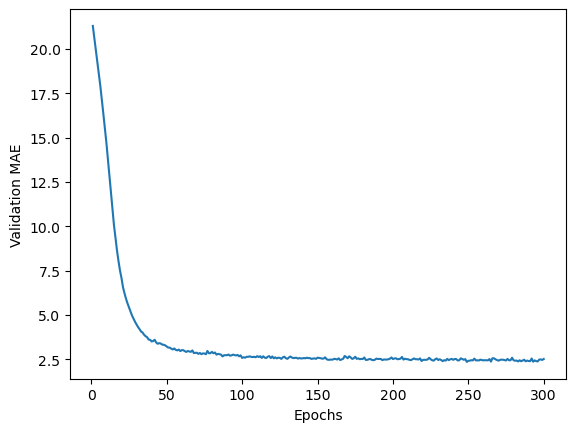

In [74]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

To reduce effect of high variance in initial epoches, omit first 10 epochs of validation MAE.

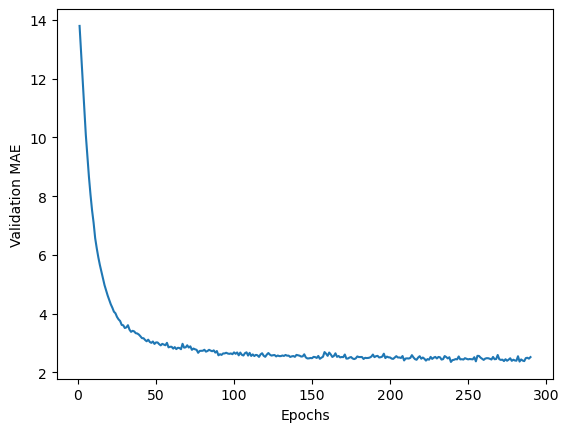

In [75]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

By the plot made before, we can get optimal epochs, in this time we set epochs=130 with batch size=16

In [76]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.6258 - mae: 2.3482 


In [77]:
test_mae_score

2.556758403778076

In [78]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([8.010756], dtype=float32)

## Load data

Load MNIST data

In [79]:
(train_images, train_labels), _ = mnist.load_data()

In MNIST data, we have total 60,000 $28\times28$ pixels hand written digits like

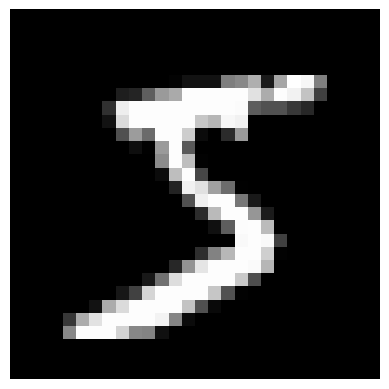

In [80]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

We can denote this $28\times28$ picture as $28\times28$ 2-dimensional matrix

$$\mathbf{X}=\left(\begin{matrix}x_{11}&x_{12}&\cdots&x_{1,28}\\x_{21}&x_{22}&\cdots&x_{2,28}\\\vdots&\vdots&\ddots&\vdots\\x_{28,1}&x_{28,2}&\cdots&x_{28,28}\end{matrix}\right)\tag{26}$$

For matrix operations, transform $28\times28$ matrix into $784\times1$ vector

$$\mathbf{X}'=\left(\begin{matrix}x_{11}&x_{12}&\cdots&x_{1,28}&x_{21}&x_{22}&\cdots&x_{2,28}&\cdots&x_{28,28}\end{matrix}\right)$$

In [81]:
train_images = train_images.reshape((60000, 28 * 28))

When we visualize picture we just saw after transformation, 

In [82]:
plt.figure(figsize=(20,5))
plt.imshow(train_images[0].reshape(1, 784), cmap='gray')
plt.axis('off')
plt.show()

For faster training, normalize each pixel value (0–255) to the 0–1

In [83]:
train_images = train_images.astype("float32") / 255

## Effect of Noise

Add random noise to MNIST data

In [84]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

We can see that random noise image part was added after the orginal image

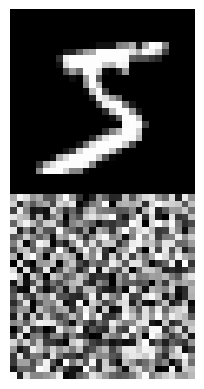

In [85]:
plt.imshow(train_images_with_noise_channels[0].reshape(56, 28), cmap='gray')
plt.axis('off')
plt.show()

Add all-zero data to MNIST data, this time, added part don't have much effect on original data

In [86]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

We can see that the all-zero(black) image was added after the orginal image

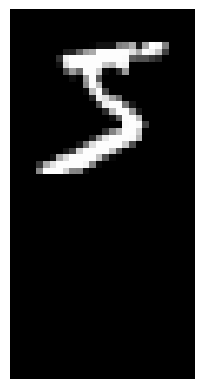

In [87]:
plt.imshow(train_images_with_zeros_channels[0].reshape(56, 28), cmap='gray')
plt.axis('off')
plt.show()

Make model with 1 hidden layer

In [88]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

Train model with white-noise(random noise)

In [89]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6957 - loss: 1.0238 - val_accuracy: 0.9053 - val_loss: 0.3106
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9179 - loss: 0.2678 - val_accuracy: 0.9404 - val_loss: 0.1972
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9461 - loss: 0.1691 - val_accuracy: 0.9519 - val_loss: 0.1546
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9628 - loss: 0.1178 - val_accuracy: 0.9491 - val_loss: 0.1714
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9732 - loss: 0.0863 - val_accuracy: 0.9628 - val_loss: 0.1272
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9794 - loss: 0.0635 - val_accuracy: 0.9620 - val_loss: 0.1332
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9859 - loss: 0.0456 - val_accuracy: 0.9508 - val_loss: 0.1730
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9898 - loss: 0.0340 - val_accu

Train model with all-zero  data

In [90]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8594 - loss: 0.4876 - val_accuracy: 0.9564 - val_loss: 0.1498
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9620 - loss: 0.1311 - val_accuracy: 0.9699 - val_loss: 0.1043
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9758 - loss: 0.0851 - val_accuracy: 0.9736 - val_loss: 0.0899
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9835 - loss: 0.0585 - val_accuracy: 0.9769 - val_loss: 0.0828
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9877 - loss: 0.0441 - val_accuracy: 0.9782 - val_loss: 0.0738
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9763 - val_loss: 0.0809
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9941 - loss: 0.0226 - val_accuracy: 0.9778 - val_loss: 0.0790
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9955 - loss: 0.0182 - val_accu

Train model with origianl data

In [91]:
model = get_model()
history_ori = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8627 - loss: 0.4802 - val_accuracy: 0.9533 - val_loss: 0.1571
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9612 - loss: 0.1330 - val_accuracy: 0.9663 - val_loss: 0.1125
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9765 - loss: 0.0798 - val_accuracy: 0.9724 - val_loss: 0.0877
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9827 - loss: 0.0600 - val_accuracy: 0.9765 - val_loss: 0.0774
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9891 - loss: 0.0407 - val_accuracy: 0.9766 - val_loss: 0.0795
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9908 - loss: 0.0324 - val_accuracy: 0.9775 - val_loss: 0.0749
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9936 - loss: 0.0243 - val_accuracy: 0.9764 - val_loss: 0.0805
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accu

When we compare model with random noise and all-zero data, model with random noise's validation accuracy is lower than model with all-zero data. We can see that the noise on data affact the model's performance

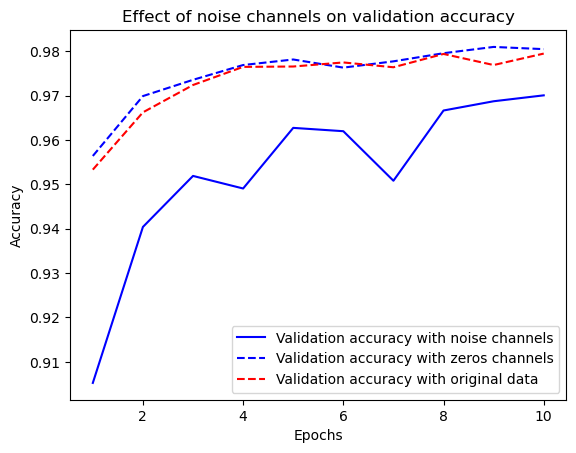

In [92]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_ori = history_ori.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_ori, "r--", 
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Effect of Model's Label

Load MNIST data again

In [93]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

We can wonder whether the model is simply memorizing the data with label. So this time, we will shuffle the data and label.

In [94]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

When we check first image by visualizing, we can see there is 5

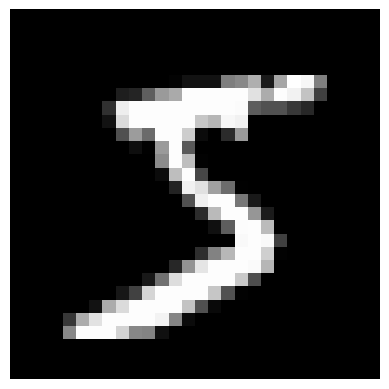

In [95]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

However, when we check the label, it said it's 8. Like this, labels of images was randomly shuffled, and if model just memorized the data with label, the accuracy will be good. However, if the model actually learn the data's pattern with label, than the perfromance will be extremely bad.

In [96]:
random_train_labels[0]

2

As we done before, make same model

In [97]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

This time, accuracy decreased below the 0.6, and validation loss continuously increased. This means that the model actually learn the pattern of data, not just memorizing the label with data

In [98]:
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1016 - loss: 2.3293 - val_accuracy: 0.0987 - val_loss: 2.3095
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1193 - loss: 2.2973 - val_accuracy: 0.1002 - val_loss: 2.3120
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1284 - loss: 2.2884 - val_accuracy: 0.1009 - val_loss: 2.3228
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1430 - loss: 2.2760 - val_accuracy: 0.1004 - val_loss: 2.3279
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1535 - loss: 2.2595 - val_accuracy: 0.0976 - val_loss: 2.3391
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1727 - loss: 2.2375 - val_accuracy: 0.1007 - val_loss: 2.3536
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1848 - loss: 2.2148 - val_accuracy: 0.0970 - val_loss: 2.3636
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2016 - loss: 2.1842 - val_accu

## Effect of Model's Learning Rate

Load MNIST data again

In [99]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

As we done before, make same model

In [100]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In this time, we set very high learning rate($\eta=1$)

In [101]:
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

We can see that value of accuracy, loss are unstable and very poor

In [102]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4720 - loss: 3398.6511 - val_accuracy: 0.2098 - val_loss: 2.4928
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1965 - loss: 3.3576 - val_accuracy: 0.2225 - val_loss: 2.3870
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2055 - loss: 2.3072 - val_accuracy: 0.2136 - val_loss: 2.1131
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2006 - loss: 2.5004 - val_accuracy: 0.2365 - val_loss: 2.0776
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2061 - loss: 2.4925 - val_accuracy: 0.2428 - val_loss: 2.2628
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2289 - loss: 2.8571 - val_accuracy: 0.2150 - val_loss: 2.1838
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2146 - loss: 2.5219 - val_accuracy: 0.2219 - val_loss: 2.1290
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2170 - loss: 2.4283 - val_

In [103]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Setting learning rate $\eta=0.01$

In [104]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Unlike previous case, model well fitted

In [105]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8372 - loss: 0.8435 - val_accuracy: 0.9628 - val_loss: 0.1338
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9642 - loss: 0.1203 - val_accuracy: 0.9646 - val_loss: 0.1412
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9732 - loss: 0.0935 - val_accuracy: 0.9677 - val_loss: 0.1430
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9805 - loss: 0.0745 - val_accuracy: 0.9677 - val_loss: 0.1654
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9836 - loss: 0.0588 - val_accuracy: 0.9610 - val_loss: 0.2283
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9842 - loss: 0.0611 - val_accuracy: 0.9692 - val_loss: 0.2124
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9880 - loss: 0.0492 - val_accuracy: 0.9728 - val_loss: 0.1865
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9897 - loss: 0.0402 - val_acc

## Effect of Model's Layer

Small model without hidden layer, model with just input layer and output layer. It is simple layer, but it still has high accuracy and fitted well

In [106]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7384 - loss: 1.0397 - val_accuracy: 0.9028 - val_loss: 0.3609
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9013 - loss: 0.3618 - val_accuracy: 0.9142 - val_loss: 0.3104
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9099 - loss: 0.3156 - val_accuracy: 0.9162 - val_loss: 0.2943
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9149 - loss: 0.3048 - val_accuracy: 0.9210 - val_loss: 0.2842
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9195 - loss: 0.2938 - val_accuracy: 0.9236 - val_loss: 0.2774
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9199 - loss: 0.2896 - val_accuracy: 0.9240 - val_loss: 0.2752
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9207 - loss: 0.2806 - val_accuracy: 0.9251 - val_loss: 0.2714
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9226 - loss: 0.2763 - val_accuracy: 0

Even though model fitted well without overfitting, it doesn't have any hidden layer, the accuracy cannot be improved significantly

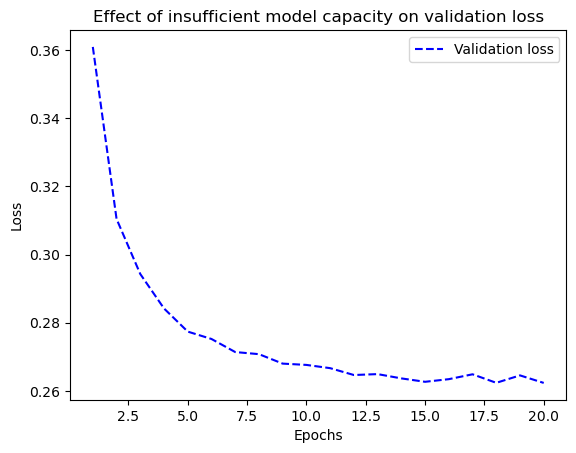

In [107]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

This time, we have more complex model with 2 hidden layers, accuracy is very high but, validation loss increased slightly, it can be little bit overfitted

In [108]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8335 - loss: 0.6117 - val_accuracy: 0.9456 - val_loss: 0.1894
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9494 - loss: 0.1731 - val_accuracy: 0.9584 - val_loss: 0.1335
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9656 - loss: 0.1163 - val_accuracy: 0.9663 - val_loss: 0.1093
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9730 - loss: 0.0850 - val_accuracy: 0.9654 - val_loss: 0.1127
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9797 - loss: 0.0688 - val_accuracy: 0.9703 - val_loss: 0.0991
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9830 - loss: 0.0541 - val_accuracy: 0.9702 - val_loss: 0.0972
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9864 - loss: 0.0455 - val_accuracy: 0.9731 - val_loss: 0.0938
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9887 - loss: 0.0372 - val_accu

## Effect of Network's size

Load top 10,000 words from IMDb data

In [109]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

Like one-hot encoding, transform data

In [110]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

In [111]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6933 - loss: 0.5916 - val_accuracy: 0.8662 - val_loss: 0.3866
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8947 - loss: 0.3288 - val_accuracy: 0.8760 - val_loss: 0.3222
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9210 - loss: 0.2407 - val_accuracy: 0.8771 - val_loss: 0.3056
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9376 - loss: 0.1933 - val_accuracy: 0.8868 - val_loss: 0.2836
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9507 - loss: 0.1554 - val_accuracy: 0.8847 - val_loss: 0.2905
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9562 - loss: 0.1379 - val_accuracy: 0.8864 - val_loss: 0.2934
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9692 - loss: 0.1101 - val_accuracy: 0.8721 - val_loss: 0.3448
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9703 - loss: 0.0995 - val_accuracy: 0.8844 - v

Small model, model can be underfitted

In [112]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6270 - loss: 0.6662 - val_accuracy: 0.8180 - val_loss: 0.5660
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8640 - loss: 0.5271 - val_accuracy: 0.8657 - val_loss: 0.4609
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8880 - loss: 0.4224 - val_accuracy: 0.8744 - val_loss: 0.3904
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9071 - loss: 0.3446 - val_accuracy: 0.8815 - val_loss: 0.3450
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9164 - loss: 0.2881 - val_accuracy: 0.8851 - val_loss: 0.3166
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9247 - loss: 0.2547 - val_accuracy: 0.8834 - val_loss: 0.3021
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9349 - loss: 0.2219 - val_accuracy: 0.8904 - val_loss: 0.2852
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9413 - loss: 0.1972 - val_accuracy: 0.8914 - v

Large model, model can be overfitted

In [113]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.6593 - loss: 0.6511 - val_accuracy: 0.7617 - val_loss: 0.4928
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.8397 - loss: 0.3643 - val_accuracy: 0.8864 - val_loss: 0.2767
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.9151 - loss: 0.2157 - val_accuracy: 0.8686 - val_loss: 0.3107
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.9334 - loss: 0.1763 - val_accuracy: 0.8785 - val_loss: 0.2920
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.9562 - loss: 0.1252 - val_accuracy: 0.8294 - val_loss: 0.4018
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.9640 - loss: 0.1036 - val_accuracy: 0.8818 - val_loss: 0.3245
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.9786 - loss: 0.0733 - val_accuracy: 0.8831 - val_loss: 0.3399
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.9937 - loss: 0.0320 - val_accuracy: 0

Used L2 regularization to avoid overfitting, but accuracy may be decreased

In [114]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6891 - loss: 0.6851 - val_accuracy: 0.8560 - val_loss: 0.4814
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8932 - loss: 0.4167 - val_accuracy: 0.8849 - val_loss: 0.3877
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9171 - loss: 0.3322 - val_accuracy: 0.8816 - val_loss: 0.3710
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9299 - loss: 0.2867 - val_accuracy: 0.8749 - val_loss: 0.3765
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9371 - loss: 0.2667 - val_accuracy: 0.8874 - val_loss: 0.3515
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9475 - loss: 0.2415 - val_accuracy: 0.8866 - val_loss: 0.3539
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9525 - loss: 0.2299 - val_accuracy: 0.8773 - val_loss: 0.3745
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9544 - loss: 0.2222 - val_accuracy: 0.8839 - v

We can use L1 regularization, or L1 and L2 regularization together, but accuracy may be decreased

In [115]:
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

Used dropout to avoid overfitting, but accuracy may be decreased

In [116]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5917 - loss: 0.6568 - val_accuracy: 0.8494 - val_loss: 0.4769
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7683 - loss: 0.5017 - val_accuracy: 0.8770 - val_loss: 0.3793
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8278 - loss: 0.4153 - val_accuracy: 0.8801 - val_loss: 0.3239
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8650 - loss: 0.3615 - val_accuracy: 0.8895 - val_loss: 0.2934
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8877 - loss: 0.3152 - val_accuracy: 0.8888 - val_loss: 0.2796
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9012 - loss: 0.2794 - val_accuracy: 0.8904 - val_loss: 0.2759
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9204 - loss: 0.2394 - val_accuracy: 0.8879 - val_loss: 0.2776
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9306 - loss: 0.2195 - val_accuracy: 0.8894 - v